In [1]:
from scipy.io.wavfile import read, write
import torchaudio
import torch
from librosa.util import normalize
from librosa.filters import mel as librosa_mel_fn
import numpy as np
import librosa
import librosa.display
from tqdm import tqdm
import os
import soundfile as sf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
wav_path = "/blob/v-yuancwang/audio_editing_data/audiocaps/wav"
wav_files = os.listdir(wav_path)
print(len(wav_files))

43306


In [8]:
MAX_WAV_VALUE = 32768.0
save_path = "/blob/v-yuancwang/audio_editing_data/audiocaps_refine"

In [33]:
V = []
for file_name in tqdm(wav_files[:]):
    wav, sr = librosa.load(os.path.join(wav_path, file_name), sr=16000)
    v = []
    for i in range(0, len(wav), 1024):
        v.append(np.mean(abs(wav[i: i+1024])))
    V.append(max(v))
    if max(v) < 0.02:
        print(max(v), file_name)
        wav *= 5
        wav = wav * MAX_WAV_VALUE
        wav = wav.astype('int16')
        write(os.path.join(save_path, "wav", file_name), 16000, wav)
    if max(v) > 0.4:
        print(max(v), file_name)
        wav *= 2
        wav = wav * MAX_WAV_VALUE
        wav = wav.astype('int16')
        write(os.path.join(save_path, "wav", file_name), 16000, wav)

  2%|▏         | 19/1000 [00:00<00:08, 112.80it/s]

0.0022961795 --N8lbFywRg.wav
0.002485633 --RBwc_VFYA.wav
0.012067169 --V9KO_QLxk.wav


  3%|▎         | 31/1000 [00:00<00:17, 54.79it/s] 

0.0072425604 --YiwOrObMM.wav
0.016913354 --l7xfUFwc8.wav


  5%|▍         | 48/1000 [00:00<00:12, 73.34it/s]

0.0148305595 -0N94QVF92E.wav
0.004972458 -0PoYyUq4kE.wav
0.012141019 -0TJmdb_QjQ.wav


 10%|▉         | 96/1000 [00:01<00:08, 102.50it/s]

0.01381588 -1guPbH2s3Y.wav
0.01699686 -1hLtbqqxTM.wav
0.015410036 -2--Xzix2Vk.wav


 11%|█         | 109/1000 [00:01<00:10, 82.59it/s]

0.008587241 -247Mdo8nJ8.wav
0.00977236 -2Ha-_EgvO4.wav
0.01606664 -2TlUBZ2lU4.wav


 13%|█▎        | 130/1000 [00:01<00:11, 72.92it/s]

0.017006487 -2WBGJ3rWX8.wav
0.00445801 -2YTLhYX3Jo.wav
0.0056349337 -2qHGzHjUOU.wav


 18%|█▊        | 175/1000 [00:01<00:06, 121.26it/s]

0.00828594 -43v51oAu6I.wav
0.015061796 -46xqouqMxA.wav
0.008775771 -4B1PkgXOMI.wav
0.0022544563 -4B9Xf1b1yI.wav


 19%|█▉        | 189/1000 [00:02<00:08, 93.38it/s] 

0.011751741 -4BWc0v8Y7U.wav
0.012445122 -4c0GKMHLkE.wav
0.015658885 -4idfEmhn4g.wav
0.012498707 -4jYmwwf6h4.wav


 22%|██▏       | 216/1000 [00:02<00:08, 94.62it/s]

0.0053625107 -4tFyjKAH7o.wav
0.0014223158 -5EoTUVneQA.wav
0.018619955 -5Gkjo10JLU.wav


 24%|██▍       | 239/1000 [00:02<00:08, 91.14it/s]

0.018668205 -5REafhKzcA.wav
0.018868566 -5q8Wh2H8fw.wav


 28%|██▊       | 278/1000 [00:03<00:06, 110.53it/s]

0.018223137 -6AOy8GAMpM.wav
0.0027406514 -6YoqXs1e_U.wav


 29%|██▉       | 290/1000 [00:03<00:07, 100.39it/s]

0.013363212 -6oD0Eu8w7g.wav
0.010070711 -7DZifiouoM.wav


 32%|███▏      | 324/1000 [00:03<00:06, 107.29it/s]

0.007799864 -7TpSmofVDo.wav
0.011474729 -7aNPr1x2aQ.wav


 34%|███▎      | 335/1000 [00:03<00:06, 106.22it/s]

0.0048614144 -8CwWdltmxM.wav
0.0030235946 -8HCidJbNh0.wav
0.012021422 -8Vvk15NwpE.wav


 36%|███▌      | 356/1000 [00:04<00:08, 74.21it/s] 

0.017401487 -8bblB1i5p4.wav
0.011395365 -8tskHwTfcQ.wav


 38%|███▊      | 375/1000 [00:04<00:08, 77.60it/s]

0.0045987964 -8yCp5GagJA.wav
0.013424367 -9FNqXff1tE.wav
0.0072846413 -9TCNRyvZss.wav


 42%|████▎     | 425/1000 [00:04<00:04, 122.03it/s]

0.014456689 -A8YCVunrGk.wav
0.015625864 -AY_lZLYJR8.wav


 44%|████▍     | 439/1000 [00:04<00:05, 99.53it/s] 

0.014319807 -AbW8iQYhG4.wav


 48%|████▊     | 476/1000 [00:05<00:05, 94.83it/s]

0.011170119 -B2_cFBbzWg.wav
0.015588045 -BIZ7zQO3_o.wav
0.009059042 -Bnctvh_6uc.wav


 51%|█████     | 512/1000 [00:05<00:04, 119.33it/s]

0.019046962 -CkJyZ2fFOY.wav
0.01971063 -D4aoPlD81Y.wav


 54%|█████▍    | 540/1000 [00:05<00:04, 109.80it/s]

0.010464102 -DMGHwhP928.wav
0.014005989 -DexfVugZDE.wav
0.0022659302 -DhD6NQulug.wav


 55%|█████▌    | 552/1000 [00:05<00:04, 92.03it/s] 

0.0072056353 -DkdgfC1d7Q.wav
0.010186434 -E12ckSK3fY.wav


 57%|█████▋    | 573/1000 [00:06<00:05, 77.68it/s]

0.016289234 -ECNklRUX4I.wav
0.007313758 -EDRNpIlIwo.wav
0.011402816 -EOnS_BJl5A.wav


 60%|██████    | 600/1000 [00:06<00:04, 88.52it/s]

0.014931083 -EcHYnFsGkw.wav
0.011839867 -EsKQANaKY0.wav


 63%|██████▎   | 629/1000 [00:06<00:03, 107.13it/s]

0.012883067 -F2OFe7DdD4.wav
0.009650439 -FWkB2IDMhc.wav


 64%|██████▍   | 641/1000 [00:06<00:03, 99.02it/s] 

0.016252726 -FdlM9BEkac.wav
0.0022500157 -Fh3GhU1QOc.wav
0.019681007 -G0mCL3NNQE.wav


 66%|██████▌   | 662/1000 [00:07<00:04, 81.05it/s]

0.01085332 -GCrlnmT1CI.wav
0.016604215 -GXt9AWAUDA.wav


 69%|██████▊   | 686/1000 [00:07<00:03, 81.78it/s]

0.014691919 -GhPqBvBVUw.wav
0.008952796 -GujlR2WxPs.wav
0.008120358 -Gz3fJ1ZDCQ.wav


 70%|██████▉   | 696/1000 [00:07<00:03, 79.25it/s]

0.0152587 -HCxERW__4g.wav
0.016530067 -HLTp7gPBEw.wav
0.01914832 -HMV5ZZPkFo.wav


 71%|███████▏  | 713/1000 [00:07<00:03, 72.60it/s]

0.018683523 -HTzStR9WCU.wav
0.01615408 -Hwn7UdBguE.wav


 74%|███████▍  | 738/1000 [00:08<00:03, 71.97it/s]

0.012992144 -I1upuU0HXs.wav
0.017410249 -I2wwE7WFOU.wav


 76%|███████▌  | 757/1000 [00:08<00:03, 79.98it/s]

0.016925275 -IK4okM-Xxw.wav
0.012278527 -IbSBeEuZ_w.wav
0.008192509 -ImF0CfLttk.wav


 78%|███████▊  | 775/1000 [00:08<00:02, 75.44it/s]

0.0058431327 -IzmxeAmmGs.wav
0.005573809 -J0fLqumm_s.wav
0.016418904 -JFFbS1Z8DE.wav


 80%|███████▉  | 795/1000 [00:08<00:02, 79.65it/s]

0.004455626 -JXjioXie3c.wav
0.017807603 -KVrHjbwy5M.wav


 85%|████████▍ | 849/1000 [00:09<00:01, 117.41it/s]

0.006952226 -KqJjhvd_bo.wav
0.009860218 -LR6jZzVFHs.wav


 86%|████████▌ | 861/1000 [00:09<00:01, 99.41it/s] 

0.015122801 -LS-JevBX3E.wav
0.010853022 -LbiadrZ7OQ.wav
0.018728763 -Ln9HQ6lLtI.wav


 88%|████████▊ | 882/1000 [00:09<00:01, 90.53it/s]

0.015774399 -LoLWmQpaU8.wav
0.0024178326 -M-U0XvpB08.wav
0.017689645 -MAOwvbL-XY.wav


 89%|████████▉ | 892/1000 [00:09<00:01, 84.86it/s]

0.0015244782 -MCWb5PQvPI.wav
0.019304156 -MixfkIwVwk.wav


 92%|█████████▎| 925/1000 [00:10<00:00, 101.56it/s]

0.018274665 -Mo7R6zQ23M.wav
0.009455889 -NAudeSqwWc.wav


 97%|█████████▋| 967/1000 [00:10<00:00, 108.88it/s]

0.011869907 -NbQtU6kHDQ.wav
0.018308342 -NsUQ2A0ClQ.wav


 99%|█████████▉| 989/1000 [00:10<00:00, 100.50it/s]

0.013153315 -O7aTNBwnQw.wav
0.006897539 -OFirIvejBQ.wav


100%|██████████| 1000/1000 [00:10<00:00, 90.98it/s]

0.012689918 -OW80ngpmqk.wav
0.008150786 -O_Z1cDQWLg.wav


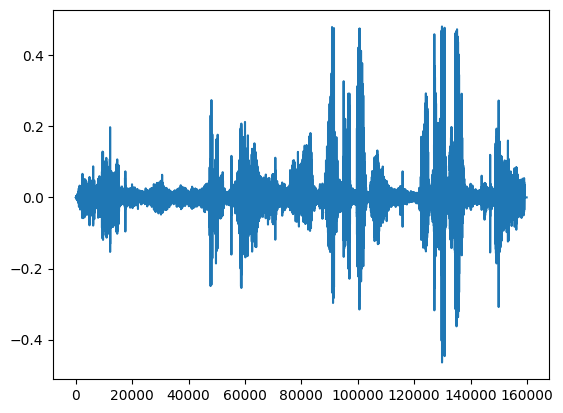

In [26]:
plt.plot(wav)